### Data Cleaning and processing 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df= pd.read_csv('ecommerce_customer_data.csv')


In [4]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [7]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [10]:
df[df.duplicated()]

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn


In [11]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [13]:
df['Product Category'].unique()

array(['Electronics', 'Home', 'Clothing', 'Books'], dtype=object)

In [18]:
df['Product Price'].unique()

array([ 12, 468, 288, 196, 449, 250,  73, 337, 182, 394, 366, 348, 103,
       240, 368,  30, 153, 259, 489, 232, 255, 227,  60, 285, 100,  28,
       382, 400, 410,  70, 243, 131, 327, 405, 219, 218, 304,  20,  31,
       434, 156, 119,  53, 485, 191, 355, 284,  82, 370, 380, 365, 101,
       453, 362, 448, 197,  21, 441, 401, 276,  15, 164, 136, 299, 291,
       342, 265, 124, 388, 121,  18, 450, 313, 389, 177,  62,  63, 140,
       386, 188, 371, 392, 486, 323, 332,  92, 495, 127, 289,  79, 294,
       364, 133,  16, 212,  90,  46,  39, 424, 229, 113, 129, 404, 437,
       445, 340, 409,  86, 354,  80, 158, 215, 151,  69, 417, 349,  56,
       462,  88,  71, 432, 393, 184, 118, 416, 334, 413, 492, 198, 375,
        38, 414, 341, 314, 353, 346, 322, 430,  84,  55, 325, 270, 384,
       168, 425, 428, 108, 114,  87, 258, 137, 465, 111,  32, 122, 150,
        37, 419, 383, 398, 396, 155,  35, 202, 484,  49,  95, 238, 209,
        36, 488,  25, 214, 493, 315, 435, 381, 333, 224, 480, 20

In [7]:
df['Quantity'].unique()

array([3, 4, 2, 1, 5])

In [9]:
df['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Cash', 'Crypto'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [16]:
df['Purchase Date']= pd.to_datetime(df['Purchase Date'])

In [17]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


### Exploratory Data Analysis 

In [19]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

Gender

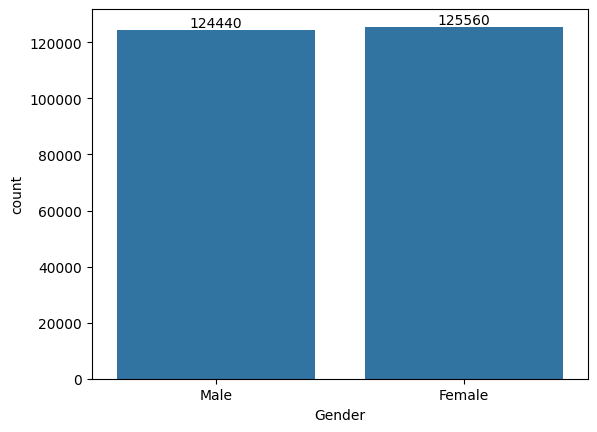

In [23]:
ax= sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)
    
